In [1]:
%matplotlib widget
%load_ext autoreload
%autoreload 2
from src.cort_processor import *

from src.plotter import *
from src.filters import *
import math
import pickle
import scipy
import matplotlib.pyplot as plt
from  matplotlib.colors import LinearSegmentedColormap
from matplotlib.pyplot import cm
from scipy import signal
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats as stats
from matplotlib import colors as mcolors
from mpl_toolkits.mplot3d import Axes3D
import tdt 
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, iirnotch, filtfilt, resample, hilbert, welch
from scipy.fftpack import fft,fftfreq,rfft,irfft,ifft
from scipy.io import savemat
from src.phase_decoder_support import *
from src.neural_analysis import *
from src.wiener_filter import *
from src.folder_handler import *
from src.tdt_support import *
from src.decoders import *

rollie1129 = CortProcessor('/mnt/c/oobootoo/rat-fes/data/rollie/1129')
rollie1129.process()



The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


In [2]:
rollie1129 = CortProcessor('/mnt/c/oobootoo/rat-fes/data/rollie/1129')
rollie1129.process()

read from t=0s to t=371.88s
read from t=0s to t=352.3s


(array([[ 20.,  80.,  20., ...,  40.,  20.,  20.],
        [ 20.,  40.,   0., ...,  20.,  20.,  60.],
        [  0.,  40.,  40., ..., 140.,  20.,  40.],
        ...,
        [ 20.,   0.,   0., ...,  20.,  20.,   0.],
        [ 40.,  40.,   0., ...,  20.,  40.,  80.],
        [  0.,  40.,   0., ...,  20.,   0.,   0.]]),
 array([[167.48464387,  63.85915525,  85.57627118, ...,  61.62516639,
          82.02233546, 160.45151816],
        [162.68903079,  67.16539274,  79.07084519, ...,  59.99230052,
          76.71208209, 165.0244428 ],
        [163.31619854,  55.54741612,  84.60433203, ...,  64.38591679,
          82.54450781, 163.78877682],
        ...,
        [147.91989055,  54.29923447, 103.29290928, ...,  74.90590892,
          96.67447058, 159.89321414],
        [144.20502153,  54.43811062, 104.45613898, ...,  75.77255941,
          98.28704118, 158.96151146],
        [142.76760199,  54.96163038, 106.93983068, ...,  76.36840837,
         106.24960909, 164.28462118]]))

In [7]:
h_sin, h_cos, r2, predicted_arctans, test_arctans, test_rates, phase_list, order_test, test_r2 = rollie1129.decode_phase(metric_angle="knee")

In [8]:
# rollie1209 = CortProcessor('/mnt/c/oobootoo/rat-fes/data/rollie/1209')
# rollie1209.process()

In [9]:
# _, _, _, _, _, _ = rollie1209.decode_phase()

In [10]:
# rollie1216 = CortProcessor('/mnt/c/oobootoo/rat-fes/data/rollie/1216')
# rollie1216.process()

In [11]:
# _, _, _, _, _, _ = rollie1216.decode_phase()

In [12]:
# rollie1220 = CortProcessor('/mnt/c/oobootoo/rat-fes/data/rollie/1220')
# rollie1220.process()

In [13]:
# _, _, _, _, _, _ = rollie1220.decode_phase()

In [14]:
# morbo1101 = CortProcessor('/mnt/c/oobootoo/rat-fes/data/morbo1101')
# morbo1101.process()

In [15]:
# _, _, _, _, _, _ = morbo1101.decode_phase()

In [16]:
# morbo1101.impulse_response(AOI = 1, H = 'sin')

In [17]:
# _, _ = morbo1101.DOM(angle_name = 'limbfoot')
# _, _ = morbo1101.DOM(angle_name = 'knee')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
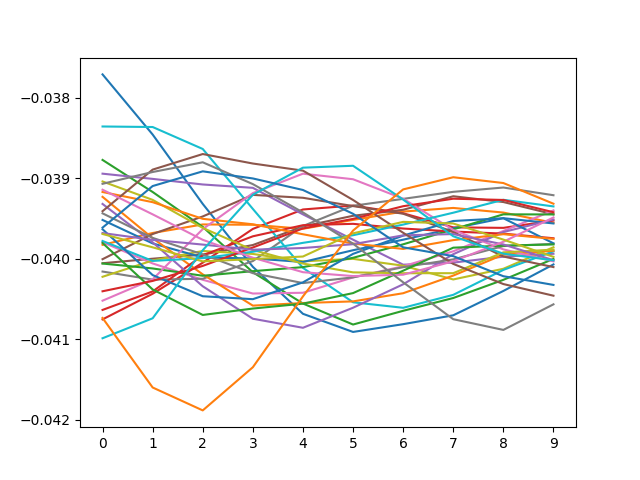

In [18]:
_ = rollie1129.impulse_response(AOI = 1, H = 'sin')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
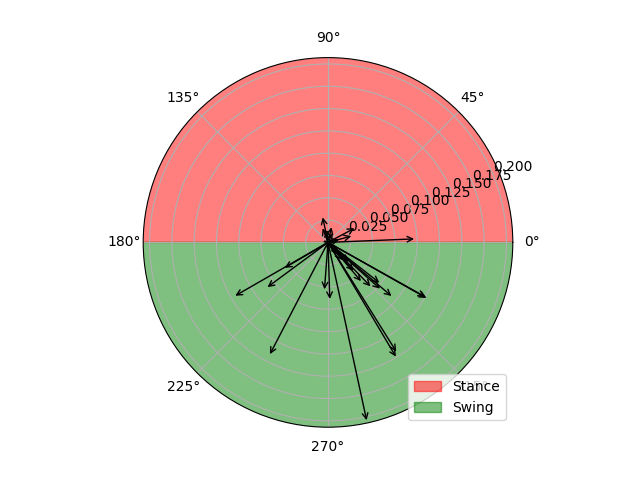

In [19]:
_, _ = rollie1129.DOM(angle_name = 'knee')
# _, _ = rollie1209.DOM(angle_name = 'knee')
# _, _ = rollie1216.DOM(angle_name = 'knee')
# _, _ = rollie1220.DOM(angle_name = 'knee')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
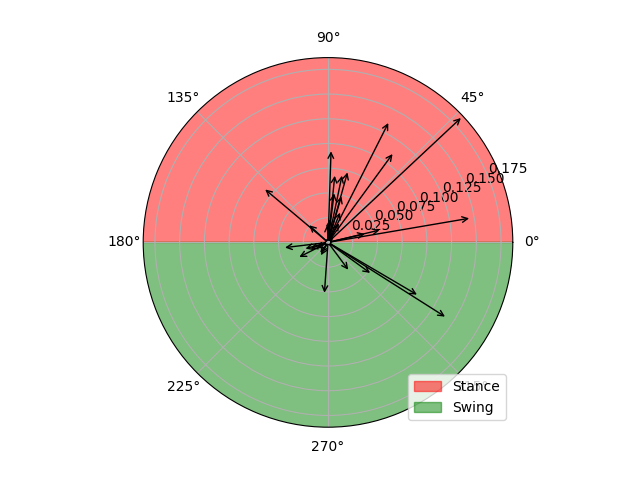

In [20]:
_, _ = rollie1129.DOM(angle_name = 'limbfoot')
# _, _ = rollie1209.DOM(angle_name = 'limbfoot')
# _, _ = rollie1216.DOM(angle_name = 'limbfoot')
# _, _ = rollie1220.DOM(angle_name = 'limbfoot')

In [21]:
print(rollie1129.data['angle_names'])
print(rollie1129.data['bodyparts'])
print(r2)

['foot', 'knee', 'hip', 'limbfoot', 'hand', 'elbow', 'shoulder', 'forelimb']
['toe', 'MTP', 'ankle', 'knee', 'pelvis bottom', 'hip', 'pelvis top', 'finger', 'knuckle', 'wrist', 'elbow', 'shoulder', 'scapula', 'x1', 'x2', 'y1', 'y2']
[0.23159571 0.4905207  0.3175701  0.35140312 0.27808686 0.33737857
 0.2416477  0.37491489]


In [22]:
wrist_y = rollie1129.marker_position('wrist', 1)
scapula_y = rollie1129.marker_position('scapula', 1)
relative_y = wrist_y - scapula_y 
y_min = np.min(relative_y)
rel_y = relative_y - y_min
wrist_x = rollie1129.marker_position('wrist', 0)
shoulder_x = rollie1129.marker_position('shoulder', 0)
relative_x = shoulder_x - wrist_x
min_x = np.min(relative_x)
rel_x = relative_x - min_x
tsf = np.linspace(0, (phase_list.shape[0]*50)/1000,phase_list.shape[0])

In [23]:
print(relative_x)
print(rel_x)

[-53.5606315  -32.69419442 -17.95163977 ... -29.28437329 -26.69257035
 -25.68541596]
[25.80977327 46.67621035 61.418765   ... 50.08603149 52.67783442
 53.68498881]


In [24]:
dy = np.diff(rel_y)
dx = np.diff(rel_x)
dt = tsf[1]-tsf[0]
dydt = dy/dt
dxdt = dx/dt
ddy = np.diff(rel_y, 2)
ddx = np.diff(rel_x, 2)
ddyddt = ddy/(dt**2)
ddxddt = ddx/(dt**2)
dddy = np.diff(rel_y, 3)
dddydddt = dddy/(dt**3)
dddx = np.diff(rel_x, 3)
dddxdddt = dddx/(dt**3)
_, kin = rollie1129.stitch_and_format()
fore_angle = kin[:, 7]
dtheta = np.diff(fore_angle)
dthetadt = dtheta/dt
ddtheta = np.diff(fore_angle, 2)
ddthetaddt = ddtheta/(dt**2)
dddtheta = np.diff(fore_angle, 3)
dddthetadddt = dddtheta/(dt**3)

dddthetadddt = np.append(dddthetadddt, [0,0,0])
ddthetaddt = np.append(ddthetaddt, [0,0])
dthetadt = np.append(dthetadt, [0])

dddxdddt = np.append(dddxdddt, [0,0,0])
ddxddt = np.append(ddxddt, [0,0])
dxdt = np.append(dxdt, [0])

In [25]:
peaks_theta, _ = spicy.signal.find_peaks(fore_angle, wlen= 60, prominence = 6, distance = 5, height = np.mean(fore_angle))    
neg_peaks_theta, _ = spicy.signal.find_peaks(-(fore_angle), wlen= 60, prominence = 6, distance = 5, height = np.mean(fore_angle))    

peaks_dthetadt_plus, _ = spicy.signal.find_peaks(dthetadt, prominence=3, distance= 10)    
peaks_dthetadt_minus, _ = spicy.signal.find_peaks(-(dthetadt), prominence=3, distance= 10)    
peaks_ddthetaddt_plus, _ = spicy.signal.find_peaks(ddthetaddt, prominence=3, distance= 10)    
peaks_ddthetaddt_minus, _ = spicy.signal.find_peaks(-(ddthetaddt), prominence=3, distance= 10)    
peaks_dddthetadddt_minus, _ = spicy.signal.find_peaks(-(dddthetadddt), distance= 7, threshold =10,prominence = 5, height = -0.2*np.min(dddthetadddt))    


peaks_relx, _ = spicy.signal.find_peaks(rel_x, wlen= 60, prominence = 6, distance = 5, height = np.mean(rel_x))
neg_peaks_relx, _ = spicy.signal.find_peaks(-(rel_x), wlen= 60, prominence = 6, distance = 5, height = np.mean(rel_x))

peaks_dxdt_plus, _ = spicy.signal.find_peaks(dxdt, prominence=3, distance= 10)    
peaks_dxdt_plus, _ = spicy.signal.find_peaks(dxdt, prominence=3, distance= 10)    
peaks_dxdt_minus, _ = spicy.signal.find_peaks(-(dxdt), prominence=3, distance= 10)    
peaks_ddxddt_plus, _ = spicy.signal.find_peaks(ddxddt, prominence=3, distance= 10)    
peaks_ddxddt_minus, _ = spicy.signal.find_peaks(-(ddxddt), prominence=3, distance= 10)    
peaks_dddxdddt_minus, _ = spicy.signal.find_peaks(-(dddxdddt), distance= 7, threshold =10,prominence = 5, height = -0.2*np.min(dddxdddt))       

In [26]:
#############EVERYTHING HERE HAS ACCESS TO SEL

# def relative_x(self, 'mark_name'):
def relative_x_tmp(bodypart):
    if bodypart == 'shoulder':
        print('invalid selection')
        return None
    wrist_x = rollie1129.marker_position(bodypart, 0)
    shoulder_x = rollie1129.marker_position('shoulder', 0)
    relative_x = shoulder_x - wrist_x
    min_x = np.min(relative_x)
    rel_x = relative_x - min_x
    return rel_x





########EVERYTHING BELOW THIS POINT IS IN A SEPARATE IPYNB

def replace_with_null(arr):
    i = 0
    while i < len(arr):
        if arr[i] == 0:
            j = i
            while j < len(arr) and arr[j] == 0:
                j += 1
            if j - i >= 3:
                for k in range(i, j):
                    arr[k] = None
            i = j
        else:
            i += 1
    return arr

def replace_null(arr):
    for i in range(arr.shape[0]):
        if np.isnan(arr[i]) == True:
            arr[i] = 0
    return arr

def swing_binary(kin_signal):
    time = np.linspace(0, (kin_signal.shape[0]*50)/1000,kin_signal.shape[0])
    dt = time[1]-time[0]
    dk = np.diff(kin_signal)
    dkdt = dk/dt
    dkdt = np.append(dkdt, [0])
    dddk = np.diff(kin_signal, 3)
    dddkdddt = dddk/(dt**3)
    dddkdddt = np.append(dddkdddt, [0,0,0])
    kin_peaks, _ = spicy.signal.find_peaks(kin_signal, wlen= 60, prominence = 6, distance = 5, height = np.mean(kin_signal))
    dddkdddt_valleys, _ = spicy.signal.find_peaks(-(dddkdddt), distance= 7, threshold =10,prominence = 5, height = -0.2*np.min(dddkdddt))    
    bdkdt = np.zeros((dkdt.shape[0]))
    for i in range(len(dkdt)):
        if (dkdt[i]) >= np.max(dkdt)*0.05:
            bdkdt[i] = 1
    for i in range(1,len(bdkdt)-1,1):
        if (bdkdt[i]) == 1:
            if (bdkdt[i+1] != 1) and (bdkdt[i-1] != 1):
                bdkdt[i] = 0
    for i in range(1,len(bdkdt)-1,1):
        if (bdkdt[i]) == 0:
            if (bdkdt[i+1] == 1) and (bdkdt[i-1] == 1):
                bdkdt[i] = 1
    for i in range(5,len(bdkdt)+1,1):
        a = i
        b = -a
        if (bdkdt[b] == 1) and (bdkdt[b+1] == 0):
            conditions = [(len(bdkdt)-i-1), (len(bdkdt)-i), (len(bdkdt)-i+1),(len(bdkdt)-i+2),(len(bdkdt)-i+3)]
            if any(val in kin_peaks for val in conditions) or any(val in dddkdddt_valleys for val in conditions):
                continue
            else:
                bdkdt[b] = 0    
    return bdkdt
    
def stance_binary(kin_signal):
    time = np.linspace(0, (kin_signal.shape[0]*50)/1000,kin_signal.shape[0])
    dt = time[1]-time[0]
    dk = np.diff(kin_signal)
    dkdt = dk/dt
    dkdt = np.append(dkdt, [0])
    kin_peaks, _ = spicy.signal.find_peaks(-(kin_signal), wlen= 60, prominence = 6, distance = 5, height = np.mean(kin_signal))
    qdkdt = np.zeros((dkdt.shape[0]))
    for i in range(len(dkdt)):
        if (dkdt[i]) <= np.min(dkdt)*0.05:
            qdkdt[i] = -1
    for i in range(1,len(qdkdt)-1,1):
        if (qdkdt[i]) == -1:
            if (qdkdt[i+1] != -1) and (qdkdt[i-1] != -1):
                qdkdt[i] = 0
    for i in range(1,len(qdkdt)-1,1):
        if (qdkdt[i]) == 0:
            if (qdkdt[i+1] == -1) and (qdkdt[i-1] == -1):
                qdkdt[i] = -1
    for i in range(5,len(qdkdt)+1,1):
        a = i
        b = -a
        if (qdkdt[b] == 1) and (qdkdt[b+1] == 0):
            conditions = [(len(qdkdt)-i-1), (len(qdkdt)-i), (len(qdkdt)-i+1),(len(qdkdt)-i+2),(len(qdkdt)-i+3)]
            if any(val in kin_peaks for val in conditions):
                continue
            else:
                qdkdt[b] = 0     
    return qdkdt

def stance_swing_trinary(swing_ind, stance_ind):
    sss = np.sum((swing_ind, stance_ind), axis = 0)            
    sss_null = replace_with_null(sss)
    for i in range(1, sss_null.shape[0], 1):
        if sss_null[i] == 0:
            if sss_null[i-1] == 1:
                sss_null[i] = 1
            elif sss_null[i-1] == -1:
                sss_null[i] = -1
    np.array(sss_null)
    sstrinary = replace_null(sss_null)
    return sstrinary

def trinary_phase(kin_signal):
    swing_ind = swing_binary(kin_signal)
    stance_ind = stance_binary(kin_signal)
    trinary = stance_swing_trinary(swing_ind,stance_ind)
    return trinary

def trine_trinary_voting(trinary1, trinary2, trinary3):
    trinary0 = np.zeros((trinary1.shape[0]))
    for i in range(trinary1.shape[0]):
        if trinary1[i] == trinary2[i] or trinary1[i] == trinary3[i]:
            trinary0[i] = trinary1[i]
        elif trinary2[i] == trinary3[i]:
            trinary0[i] = trinary2[i]
        else:
            continue
    counter = 0
    for i in range(1,trinary0.shape[0]-1,1):
        if (trinary0[i] != trinary0[i-1]) and (trinary0[i] != trinary0[i+1]) and (trinary0[i+1] == trinary0[i-1]):
            trinary0[i] = trinary0[i-1]
            counter = counter+1
    print('consensus smoothing counter:',counter)
    return trinary0

#####SWING#######
bdtdt = np.zeros((dthetadt.shape[0]))
for i in range(len(dthetadt)):
    if (dthetadt[i]) >= np.max(dthetadt)*0.05:
        bdtdt[i] = 1
for i in range(1,len(bdtdt)-1,1):
    if (bdtdt[i]) == 1:
        if (bdtdt[i+1] != 1) and (bdtdt[i-1] != 1):
            bdtdt[i] = 0
for i in range(1,len(bdtdt)-1,1):
    if (bdtdt[i]) == 0:
        if (bdtdt[i+1] == 1) and (bdtdt[i-1] == 1):
            bdtdt[i] = 1
for i in range(5,len(bdtdt)+1,1):
    a = i
    b = -a
    if (bdtdt[b] == 1) and (bdtdt[b+1] == 0):
        conditions = [(len(bdtdt)-i-1), (len(bdtdt)-i), (len(bdtdt)-i+1),(len(bdtdt)-i+2),(len(bdtdt)-i+3)]
        if any(val in peaks_theta for val in conditions):
            continue
        else:
            bdtdt[b] = 0

            
#####STANCE#####
qdtdt = np.zeros((dthetadt.shape[0]))
for i in range(len(dthetadt)):
    if (dthetadt[i]) <= np.min(dthetadt)*0.05:
        qdtdt[i] = -1
for i in range(1,len(qdtdt)-1,1):
    if (qdtdt[i]) == -1:
        if (qdtdt[i+1] != -1) and (qdtdt[i-1] != -1):
            qdtdt[i] = 0
for i in range(1,len(qdtdt)-1,1):
    if (qdtdt[i]) == 0:
        if (qdtdt[i+1] == -1) and (qdtdt[i-1] == -1):
            qdtdt[i] = -1
for i in range(5,len(qdtdt)+1,1):
    a = i
    b = -a
    if (qdtdt[b] == 1) and (qdtdt[b+1] == 0):
        conditions = [(len(qdtdt)-i-1), (len(qdtdt)-i), (len(qdtdt)-i+1),(len(qdtdt)-i+2),(len(qdtdt)-i+3)]
        if any(val in neg_peaks_theta for val in conditions):
            continue
        else:
            qdtdt[b] = 0        

sss = np.sum((bdtdt,qdtdt), axis = 0)            
sss_null = replace_with_null(sss)
for i in range(1, sss_null.shape[0], 1):
    if sss_null[i] == 0:
        if sss_null[i-1] == 1:
            sss_null[i] = 1
        elif sss_null[i-1] == -1:
            sss_null[i] = -1
first_trinary = replace_null(sss_null)
        


###################################            
bdxdt = np.zeros((dxdt.shape[0]))
for i in range(len(bdxdt)):
    if (dxdt[i]) >= np.max(dxdt)*0.05:
        bdxdt[i] = 1
for i in range(1,len(bdxdt)-1,1):
    if (bdxdt[i]) == 1:
        if (bdxdt[i+1] != 1) and (bdxdt[i-1] != 1):
            bdxdt[i] = 0
for i in range(1,len(bdxdt)-1,1):
    if (bdxdt[i]) == 0:
        if (bdxdt[i+1] == 1) and (bdxdt[i-1] == 1):
            bdxdt[i] = 1
for i in range(5,len(bdxdt)+1,1):
    b = -i
    if (bdxdt[b] == 1) and (bdxdt[b+1] == 0):
        conditions = [(len(bdxdt)-i-1), (len(bdxdt)-i), (len(bdxdt)-i+1), (len(bdxdt)-i+2), (len(bdxdt)-i+3)]
        if any(val in peaks_relx for val in conditions):
            continue
        else:
            bdxdt[b] = 0 

bdpdt = np.sum((bdtdt, bdxdt), axis=0)
for i in range(1,len(bdpdt),1):
    if (bdpdt[i]) == 1:
        if (bdpdt[i-1]) == 0:
            bdpdt[i] = 0
for i in range(len(bdpdt)):
    if (bdpdt[i]) > 0:
        bdpdt[i] = 1

In [27]:
insanity_check = trinary_phase(fore_angle)
sanity_check = trinary_phase(rel_x)
rel_finger = relative_x_tmp('finger')
for_democracy = trinary_phase(rel_finger)

voted_phase = trine_trinary_voting(insanity_check, sanity_check, for_democracy)
voted_phase.shape[0]

consensus smoothing counter: 9


12848

In [28]:
h_sin, h_cos, r2, predicted_arctans, test_arctans, test_rates, phase_list, order_test, test_r2

(array([[ 4.81972987e-02, -3.98061303e-02, -2.65041342e-02, ...,
          5.73953034e-02,  4.38625269e-02, -1.22243065e-01],
        [-2.12562689e-04, -2.63856723e-04,  1.57785337e-04, ...,
          3.95602320e-04,  2.88441934e-04, -7.71843040e-04],
        [ 2.30310436e-04,  2.52785290e-04,  1.81265722e-04, ...,
         -1.36814303e-04, -3.09685871e-04,  5.96071457e-04],
        ...,
        [ 1.92948460e-03, -1.18018604e-03,  1.65473799e-03, ...,
         -8.25147157e-04, -6.03313116e-04, -5.11605098e-04],
        [ 5.34666528e-04,  1.92902810e-04,  9.52345058e-04, ...,
          5.74282037e-04,  5.53874189e-04, -1.11577299e-03],
        [-9.15480728e-05, -9.28198036e-04, -4.72431258e-04, ...,
         -1.52414743e-03, -1.47425026e-03,  1.19329283e-03]]),
 array([[ 1.60095103e-02,  2.02326956e-01,  4.00434730e-03, ...,
          6.96385044e-02,  7.12224010e-02,  1.26410738e-01],
        [-3.24909795e-04,  4.08644023e-04, -6.38287821e-04, ...,
          1.22748158e-04,  2.64029231e

In [29]:
print(order_test[:,7])
print(predicted_arctans[:,7])

[178.84677115 173.78022162 202.53782241 ... 130.88953705  99.45016816
  89.83073883]
[181.75495352 175.99058776 200.37683969 ... 352.71861946  30.36832464
  62.42674325]


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
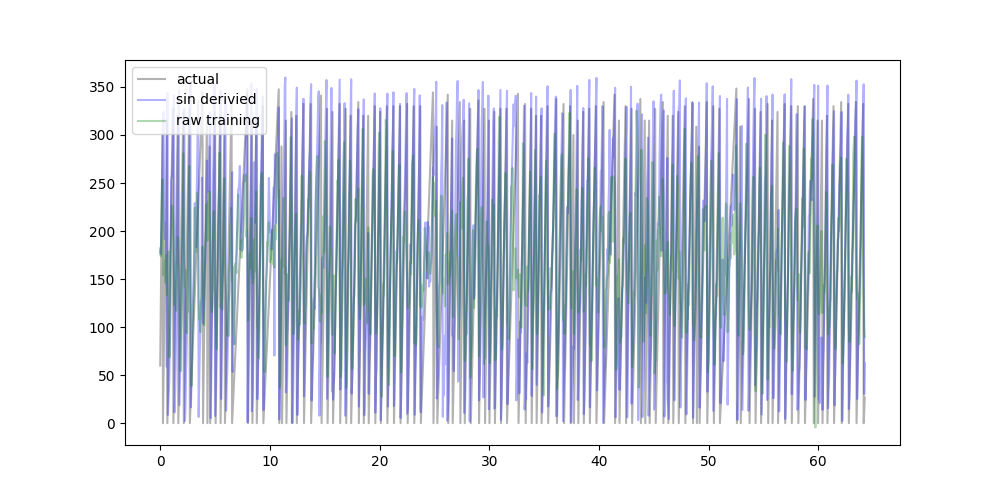

In [30]:
tst = np.linspace(0, (order_test.shape[0]*50)/1000,order_test.shape[0])
fig4, (ax0) = plt.subplots(1, 1, figsize=(10,5),sharex = True)
 
ax0.plot(tst, test_arctans[:,7], c = 'k', alpha = 0.3, label= 'actual')
ax0.plot(tst, predicted_arctans[:,7], c = 'b', alpha = 0.3, label= 'sin derivied')
ax0.plot(tst, order_test[:,7], c = 'g', alpha = 0.3, label= 'raw training')

ax0.legend(loc='upper left')


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
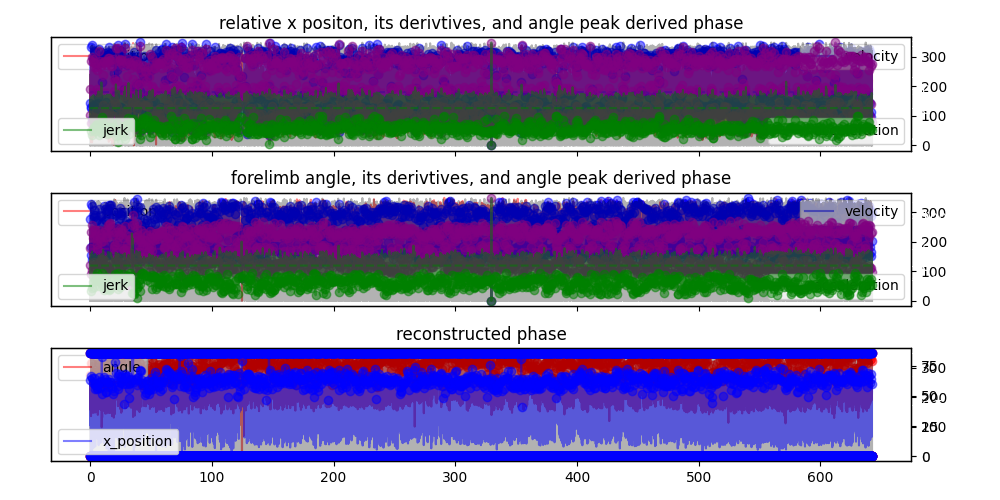

In [31]:
fig4, (ax0, ax2, ax1) = plt.subplots(3, 1, figsize=(10,5),sharex = True)
 
ax00 = ax0.twinx()    
ax000 = ax0.twinx()    
ax0000 = ax0.twinx()    
ax00000 = ax0.twinx()    
ax000.plot(tsf, phase_list[:, 7], color = 'k', alpha = 0.3, label = 'forelimb phase')
ax0.plot(tsf, rel_x, c = 'r', alpha = 0.5, label= 'position')
ax00.plot(tsf, dxdt, c = 'b', alpha = 0.5, label = 'velocity')
ax0000.plot(tsf, ddxddt, c = 'purple', alpha = 0.5, label = 'acceleration')
ax00000.plot(tsf, dddxdddt, c = 'green', alpha = 0.5, label = 'jerk')
ax0.legend(loc='upper left')
ax00.plot(tsf, np.zeros(dxdt.shape[0])+20, c = 'b', alpha = 0.5, linestyle = '--')
ax0000.plot(tsf, np.zeros(ddxddt.shape[0]), c = 'purple', alpha = 0.5, linestyle = '--')
ax00000.plot(tsf, np.zeros(dddxdddt.shape[0]), c = 'green', linestyle = '--', alpha = 0.5)
ax00.scatter(tsf[peaks_dxdt_plus], dxdt[peaks_dxdt_plus], c = 'b', alpha = 0.5)
ax00.scatter(tsf[peaks_dxdt_minus], dxdt[peaks_dxdt_minus], c = 'b', alpha = 0.5)
ax0000.scatter(tsf[peaks_ddxddt_plus], ddxddt[peaks_ddxddt_plus], c = 'purple', alpha = 0.5)
ax0000.scatter(tsf[peaks_ddxddt_minus], ddxddt[peaks_ddxddt_minus], c = 'purple', alpha = 0.5)
ax00000.scatter(tsf[peaks_dddxdddt_minus], dddxdddt[peaks_dddxdddt_minus], c = 'green', alpha = 0.5)
ax00.legend(loc='upper right')
ax0000.legend(loc='lower right')
ax00000.legend(loc='lower left')
ax0.tick_params(axis='y', colors='white')
ax00.tick_params(axis='y', colors='white')
ax0000.tick_params(axis='y', colors='white')
ax00000.tick_params(axis='y', colors='white')
ax0.set_title("relative x positon, its derivtives, and angle peak derived phase")

ax22 = ax2.twinx()    
ax222 = ax2.twinx()    
ax2222 = ax2.twinx()    
ax22222 = ax2.twinx()    
ax222.plot(tsf, phase_list[:, 7], color = 'k', alpha = 0.3, label = 'forelimb phase')
ax2.plot(tsf, fore_angle, c = 'r', alpha = 0.5, label= 'position')
ax22.plot(tsf, dthetadt, c = 'b', alpha = 0.5,label = 'velocity')
ax22.scatter(tsf[peaks_dthetadt_plus], dthetadt[peaks_dthetadt_plus], c = 'b', alpha = 0.5)
ax22.scatter(tsf[peaks_dthetadt_minus], dthetadt[peaks_dthetadt_minus], c = 'b', alpha = 0.5)
ax22.plot(tsf, np.zeros(dthetadt.shape[0])+20, c = 'b', alpha = 0.5, linestyle = '--')
ax2222.plot(tsf, ddthetaddt, c = 'purple', alpha = 0.5, label = 'acceleration')
ax2222.scatter(tsf[peaks_ddthetaddt_plus], ddthetaddt[peaks_ddthetaddt_plus], c = 'purple', alpha = 0.5)
ax2222.scatter(tsf[peaks_ddthetaddt_minus], ddthetaddt[peaks_ddthetaddt_minus], c = 'purple', alpha = 0.5)
ax2222.plot(tsf, np.zeros(ddthetaddt.shape[0]), c = 'purple', alpha = 0.5, linestyle = '--')
ax22222.plot(tsf, dddthetadddt, c = 'green', alpha = 0.5, label = 'jerk')
ax22222.scatter(tsf[peaks_dddthetadddt_minus], dddthetadddt[peaks_dddthetadddt_minus], c = 'green', alpha = 0.5)
ax22222.plot(tsf, np.zeros(dddthetadddt.shape[0]), c = 'green', linestyle = '--', alpha = 0.5)
ax2.legend(loc='upper left')
ax22.legend(loc='upper right')
ax2222.legend(loc='lower right')
ax22222.legend(loc='lower left')
ax2.tick_params(axis='y', colors='white')
ax22.tick_params(axis='y', colors='white')
ax2222.tick_params(axis='y', colors='white')
ax22222.tick_params(axis='y', colors='white')
ax2.set_title("forelimb angle, its derivtives, and angle peak derived phase")


ax11 = ax1.twinx()    
ax111 = ax1.twinx()    
ax1111 = ax1.twinx()    
ax11111=  ax1.twinx()    
ax111.plot(tsf, phase_list[:, 7], color = 'k', alpha = 0.3, label = 'forelimb phase')
ax1.plot(tsf, fore_angle, c = 'r', alpha = 0.5, label= 'angle')
ax1.scatter(tsf[peaks_theta], fore_angle[peaks_theta], c = 'r', alpha = 0.5)
ax11111.plot(tsf, rel_x, c = 'blue', alpha = 0.5, label= 'x_position')
ax11111.scatter(tsf[peaks_relx], rel_x[peaks_relx], c = 'blue', alpha = 0.5)
ax1111.scatter(tsf, bdtdt, c = 'red', alpha = 0.5)
ax1111.scatter(tsf, bdxdt, c = 'blue', alpha = 0.5)
ax1.legend(loc='upper left')
ax11111.legend(loc='lower left')
ax1.tick_params(axis='y', colors='white')
ax1111.tick_params(axis='y', colors='white')
ax11.tick_params(axis='y', colors='white')
ax1.set_title("reconstructed phase")




# ax333 = ax3.twinx()    
# ax3333 = ax3.twinx()    
# ax33333 = ax3.twinx()    
# ax333.plot(tsf, phase_list[:, 7], color = 'k', alpha = 0.3, label = 'forelimb phase')
# ax3.plot(tsf, fore_angle, c = 'r', alpha = 0.5, label= 'angle')
# ax3.scatter(tsf[peaks_theta], fore_angle[peaks_theta], c = 'r', alpha = 0.5)
# ax33333.plot(tsf, rel_x, c = 'blue', alpha = 0.5, label= 'x_position')
# ax33333.scatter(tsf[peaks_relx], rel_x[peaks_relx], c = 'blue', alpha = 0.5)
# # ax3333.scatter(tsf, bdpdt, c = 'purple', alpha = 0.5)
# ax3.legend(loc='upper left')
# ax33333.legend(loc='lower left')
# ax3.tick_params(axis='y', colors='white')
# ax3333.tick_params(axis='y', colors='white')
# ax3.set_title("reconstructed phase")


fig4.tight_layout()

In [35]:
rollie1129.crop_list

[[30, 360], [25, 338]]

Text(0.5, 1.0, 'reconstructed phase')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
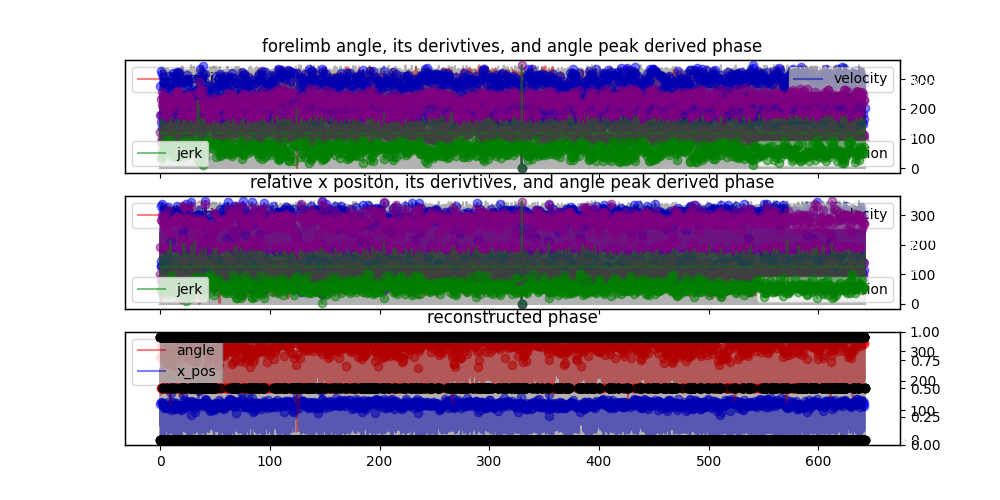

In [32]:
figq, (ax2, ax0, ax4) = plt.subplots(3, 1, figsize=(10,5),sharex = True)

ax22 = ax2.twinx()    
ax222 = ax2.twinx()    
ax2222 = ax2.twinx()    
ax22222 = ax2.twinx()    
ax222.plot(tsf, phase_list[:, 7], color = 'k', alpha = 0.3, label = 'forelimb phase')
ax2.plot(tsf, fore_angle, c = 'r', alpha = 0.5, label= 'position')
ax22.plot(tsf, dthetadt, c = 'b', alpha = 0.5,label = 'velocity')
ax22.scatter(tsf[peaks_dthetadt_plus], dthetadt[peaks_dthetadt_plus], c = 'b', alpha = 0.5)
ax22.scatter(tsf[peaks_dthetadt_minus], dthetadt[peaks_dthetadt_minus], c = 'b', alpha = 0.5)
ax22.plot(tsf, np.zeros(dthetadt.shape[0])+20, c = 'b', alpha = 0.5, linestyle = '--')
ax2222.plot(tsf, ddthetaddt, c = 'purple', alpha = 0.5, label = 'acceleration')
ax2222.scatter(tsf[peaks_ddthetaddt_plus], ddthetaddt[peaks_ddthetaddt_plus], c = 'purple', alpha = 0.5)
ax2222.scatter(tsf[peaks_ddthetaddt_minus], ddthetaddt[peaks_ddthetaddt_minus], c = 'purple', alpha = 0.5)
ax2222.plot(tsf, np.zeros(ddthetaddt.shape[0]), c = 'purple', alpha = 0.5, linestyle = '--')
ax22222.plot(tsf, dddthetadddt, c = 'green', alpha = 0.5, label = 'jerk')
ax22222.scatter(tsf[peaks_dddthetadddt_minus], dddthetadddt[peaks_dddthetadddt_minus], c = 'green', alpha = 0.5)
ax22222.plot(tsf, np.zeros(dddthetadddt.shape[0]), c = 'green', linestyle = '--', alpha = 0.5)
ax2.legend(loc='upper left')
ax22.legend(loc='upper right')
ax2222.legend(loc='lower right')
ax22222.legend(loc='lower left')
ax2.tick_params(axis='y', colors='white')
ax22.tick_params(axis='y', colors='white')
ax2222.tick_params(axis='y', colors='white')
ax22222.tick_params(axis='y', colors='white')
ax2.set_title("forelimb angle, its derivtives, and angle peak derived phase")


ax00 = ax0.twinx()    
ax000 = ax0.twinx()    
ax0000 = ax0.twinx()    
ax00000 = ax0.twinx()    
ax000.plot(tsf, phase_list[:, 7], color = 'k', alpha = 0.3, label = 'forelimb phase')
ax0.plot(tsf, rel_x, c = 'r', alpha = 0.5, label= 'position')
ax00.plot(tsf, dxdt, c = 'b', alpha = 0.5, label = 'velocity')
ax0000.plot(tsf, ddxddt, c = 'purple', alpha = 0.5, label = 'acceleration')
ax00000.plot(tsf, dddxdddt, c = 'green', alpha = 0.5, label = 'jerk')
ax0.legend(loc='upper left')
ax00.plot(tsf, np.zeros(dxdt.shape[0])+20, c = 'b', alpha = 0.5, linestyle = '--')
ax0000.plot(tsf, np.zeros(ddxddt.shape[0]), c = 'purple', alpha = 0.5, linestyle = '--')
ax00000.plot(tsf, np.zeros(dddxdddt.shape[0]), c = 'green', linestyle = '--', alpha = 0.5)
ax00.scatter(tsf[peaks_dxdt_plus], dxdt[peaks_dxdt_plus], c = 'b', alpha = 0.5)
ax00.scatter(tsf[peaks_dxdt_minus], dxdt[peaks_dxdt_minus], c = 'b', alpha = 0.5)
ax0000.scatter(tsf[peaks_ddxddt_plus], ddxddt[peaks_ddxddt_plus], c = 'purple', alpha = 0.5)
ax0000.scatter(tsf[peaks_ddxddt_minus], ddxddt[peaks_ddxddt_minus], c = 'purple', alpha = 0.5)
ax00000.scatter(tsf[peaks_dddxdddt_minus], dddxdddt[peaks_dddxdddt_minus], c = 'green', alpha = 0.5)
ax00.legend(loc='upper right')
ax0000.legend(loc='lower right')
ax00000.legend(loc='lower left')
ax0.tick_params(axis='y', colors='white')
ax00.tick_params(axis='y', colors='white')
ax0000.tick_params(axis='y', colors='white')
ax00000.tick_params(axis='y', colors='white')
ax0.set_title("relative x positon, its derivtives, and angle peak derived phase")


ax44 = ax4.twinx()    
ax444 = ax4.twinx()    
ax4444 = ax4.twinx()    
ax44444=  ax4.twinx()    
ax444.plot(tsf, phase_list[:, 7], color = 'k', alpha = 0.3, label = 'forelimb phase')
ax4.plot(tsf, fore_angle, c = 'r', alpha = 0.5, label= 'angle')
ax4.scatter(tsf[peaks_theta], fore_angle[peaks_theta], c = 'r', alpha = 0.5)
ax4.plot(tsf, rel_x, c = 'b', alpha = 0.5, label= 'x_pos')
ax4.scatter(tsf[peaks_relx], rel_x[peaks_relx], c = 'b', alpha = 0.5)
ax4444.scatter(tsf, insanity_check, c = 'r', alpha = 0.3)
ax4444.scatter(tsf, sanity_check, c = 'b', alpha = 0.3)
ax4444.scatter(tsf, for_democracy, c = 'y', alpha = 0.3)
ax4444.scatter(tsf, voted_phase, c = 'k', alpha = 0.8)



ax4.legend(loc='upper left')
# ax44444.legend(loc='lower left')
ax4.tick_params(axis='y', colors='white')
ax4444.tick_params(axis='y', colors='white')
ax44.tick_params(axis='y', colors='white')
ax4.set_title("reconstructed phase")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
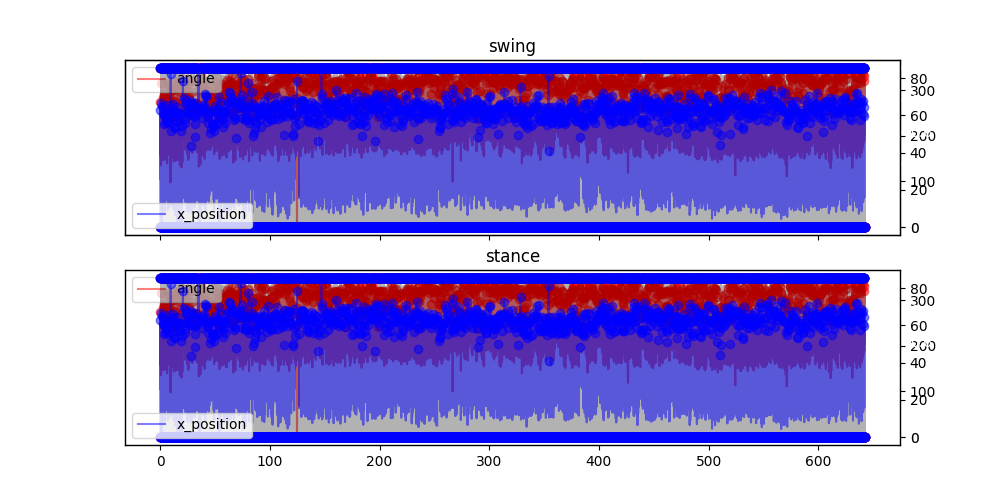

In [33]:
fig5, (ax1, ax3) = plt.subplots(2, 1, figsize=(10,5),sharex = True)
 


ax11 = ax1.twinx()    
ax111 = ax1.twinx()    
ax1111 = ax1.twinx()    
ax11111=  ax1.twinx()    
ax111.plot(tsf, phase_list[:, 7], color = 'k', alpha = 0.3, label = 'forelimb phase')
ax1.plot(tsf, fore_angle, c = 'r', alpha = 0.5, label= 'angle')
ax1.scatter(tsf[peaks_theta], fore_angle[peaks_theta], c = 'r', alpha = 0.5)
ax11111.plot(tsf, rel_x, c = 'blue', alpha = 0.5, label= 'x_position')
ax11111.scatter(tsf[peaks_relx], rel_x[peaks_relx], c = 'blue', alpha = 0.5)
ax1111.scatter(tsf, bdtdt, c = 'red', alpha = 0.5)
ax1111.scatter(tsf, bdxdt, c = 'blue', alpha = 0.5)
ax1.legend(loc='upper left')
ax11111.legend(loc='lower left')
ax1.tick_params(axis='y', colors='white')
ax1111.tick_params(axis='y', colors='white')
ax11.tick_params(axis='y', colors='white')
ax1.set_title("swing")




ax333 = ax3.twinx()    
ax3333 = ax3.twinx()    
ax33333 = ax3.twinx()    
ax333.plot(tsf, phase_list[:, 7], color = 'k', alpha = 0.3, label = 'forelimb phase')
ax3.plot(tsf, fore_angle, c = 'r', alpha = 0.5, label= 'angle')
ax3.scatter(tsf[peaks_theta], fore_angle[peaks_theta], c = 'r', alpha = 0.5)
ax33333.plot(tsf, rel_x, c = 'blue', alpha = 0.5, label= 'x_position')
ax33333.scatter(tsf[peaks_relx], rel_x[peaks_relx], c = 'blue', alpha = 0.5)
ax3333.scatter(tsf, bdtdt, c = 'red', alpha = 0.5)
ax3333.scatter(tsf, bdxdt, c = 'blue', alpha = 0.5)
ax3.legend(loc='upper left')
ax33333.legend(loc='lower left')
ax3.tick_params(axis='y', colors='white')
ax3333.tick_params(axis='y', colors='white')
ax3.set_title("stance")


fig4.tight_layout()

In [3]:
rollie1129.kin_data[0]

{'bodyparts': ['toe',
  'MTP',
  'ankle',
  'knee',
  'pelvis bottom',
  'hip',
  'pelvis top',
  'finger',
  'knuckle',
  'wrist',
  'elbow',
  'shoulder',
  'scapula',
  'x1',
  'x2',
  'y1',
  'y2'],
 'coords': array([[[121.93824787,  14.21944181, -14.18966548],
         [131.37521674,  16.10745055, -16.44892983],
         [158.35960233,  22.8892505 , -30.37898696],
         ...,
         [144.47213479,  -0.69674476,   1.89355965],
         [-67.29744298,  60.86334263,   4.36028747],
         [-66.10616701,  97.79432909,   4.43969919]],
 
        [[122.9201177 ,  13.95800012, -14.10212624],
         [132.34549463,  15.85359304, -16.34899004],
         [159.2723043 ,  23.00878655, -30.34384842],
         ...,
         [144.5027019 ,  -0.68570677,   1.94367177],
         [-67.30207715,  60.86137683,   4.3523262 ],
         [-66.12710939,  97.79446085,   4.41472929]],
 
        [[123.91048932,  13.72270735, -14.02280974],
         [133.32403753,  15.633363  , -16.25942505],
         [1

In [4]:
rollie1129.kin_data[0]['angles'].shape

(66000, 8)

In [5]:
rollie1129.kin_data[0]['bodyparts']

['toe',
 'MTP',
 'ankle',
 'knee',
 'pelvis bottom',
 'hip',
 'pelvis top',
 'finger',
 'knuckle',
 'wrist',
 'elbow',
 'shoulder',
 'scapula',
 'x1',
 'x2',
 'y1',
 'y2']

In [6]:
rollie1129.kin_data[0]['fnum'].shape

(66000,)